# import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


# EDA

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset['hour']

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
5         09:00:00
6         02:00:00
7         03:00:00
8         14:00:00
9         18:00:00
10        04:00:00
11        11:00:00
12        06:00:00
13        19:00:00
14        04:00:00
15        18:00:00
16        16:00:00
17        21:00:00
18        05:00:00
19        17:00:00
20        09:00:00
21        04:00:00
22        17:00:00
23        02:00:00
24        20:00:00
25        18:00:00
26        16:00:00
27        01:00:00
28        11:00:00
29        17:00:00
           ...    
49970     15:00:00
49971     11:00:00
49972     15:00:00
49973     18:00:00
49974     20:00:00
49975     18:00:00
49976     20:00:00
49977     15:00:00
49978     17:00:00
49979     14:00:00
49980     07:00:00
49981     04:00:00
49982     02:00:00
49983     13:00:00
49984     16:00:00
49985     23:00:00
49986     18:00:00
49987     19:00:00
49988     02:00:00
49989     17:00:00
49990     17:00:00
49991     22

# Data cleaning

In [6]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

# Ploting

In [7]:
dataset2 = dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Histograms

In [8]:
dataset2.shape

(50000, 7)

<Figure size 432x288 with 0 Axes>

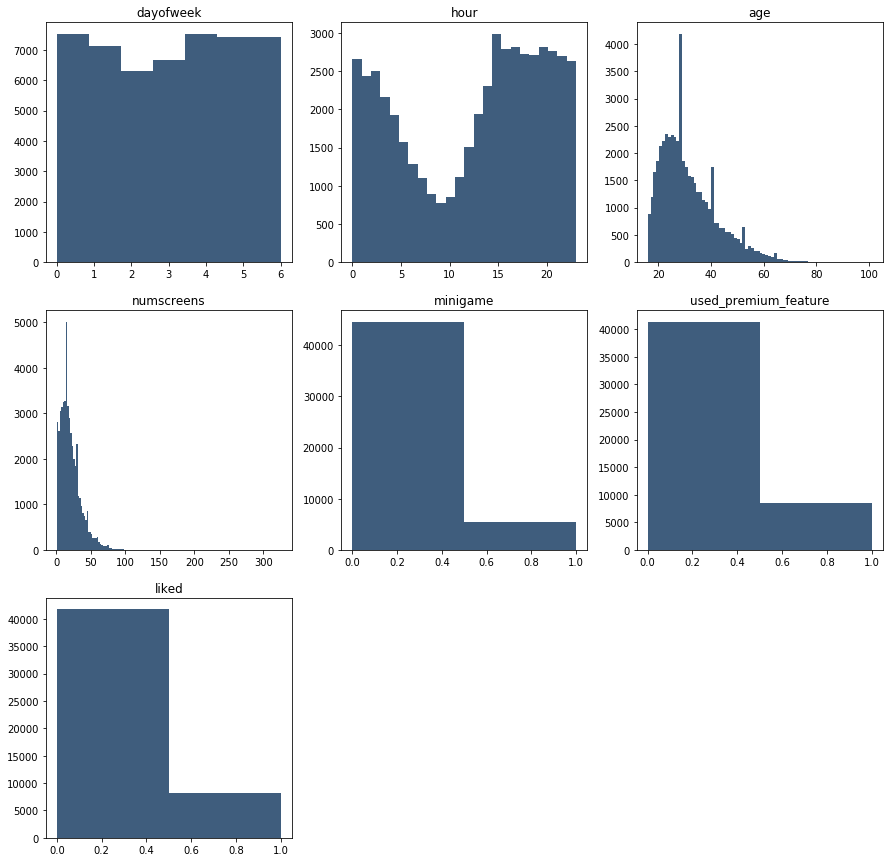

In [9]:
plt.suptitle('Histograms of Numerical columns',fontsize=20)
plt.figure(figsize=(15,15))
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')

# Correlation with response

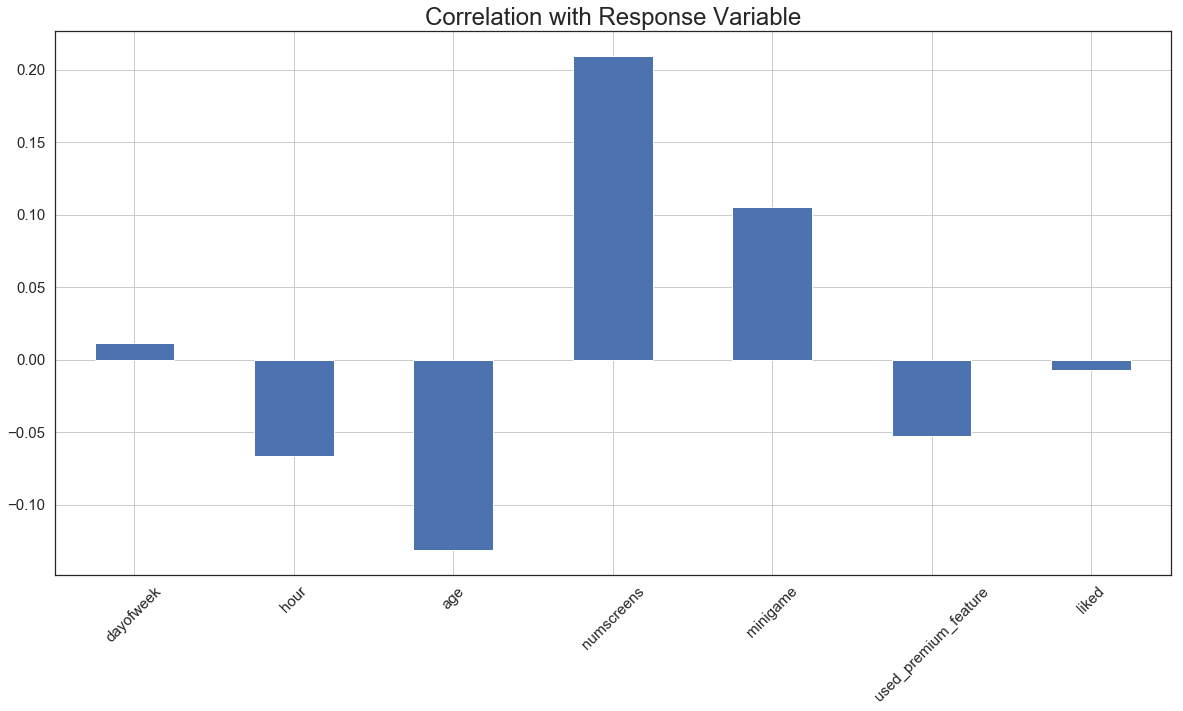

In [97]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                                           title='Correlation with Response Variable',
                                           fontsize = 15,rot = 45,grid = True)

In [98]:
###我們可以從與enrolled相關圖大約推測:
###1.一周用幾天可能不會太多影響到是否註冊
###2.不會有太多人在早晨註冊
###3.年紀越大越不會想註冊
###4.看的螢幕越多的人越有可能註冊,可能因為經常使用很多功能
###5.遊戲玩越多的人越有可能註冊,可能是因為有成就感或是解鎖關卡等因素
###6.非常有趣的現象,用越多主要功能的人竟然越不可能註冊,可能是因為對主要功能非常了解所以覺得產品可能不適合花錢去註冊
###7.同6

# Correlation Matrix

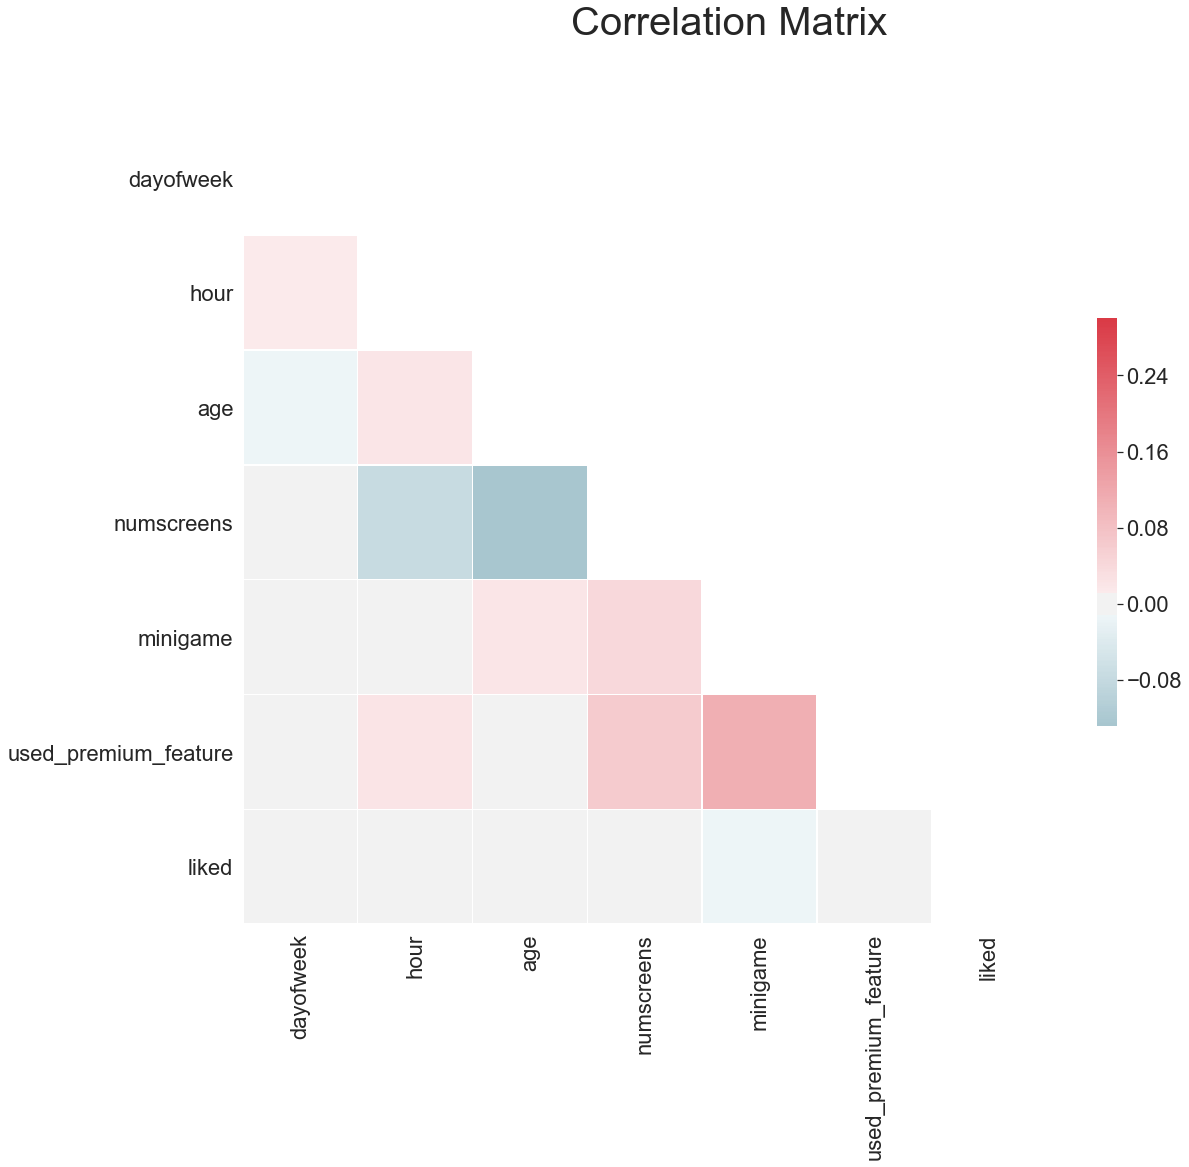

In [99]:
sns.set(style="white",font_scale=2)

corr = dataset2.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize=40)

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# Feature Engineering

In [100]:
### 處理時間:第一次使用多久後才會註冊

In [101]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [102]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']] ### because not every row has value
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

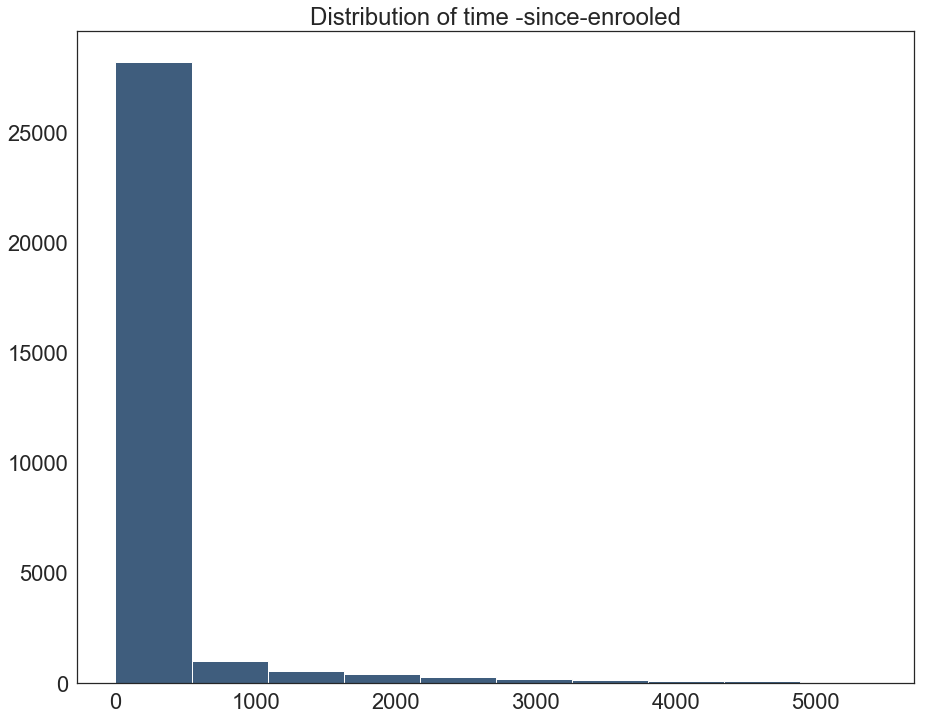

In [103]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

plt.figure(figsize=(15,12))
plt.hist(dataset["difference"].dropna(),color="#3F5D7D")
plt.title('Distribution of time -since-enrooled')
plt.show()

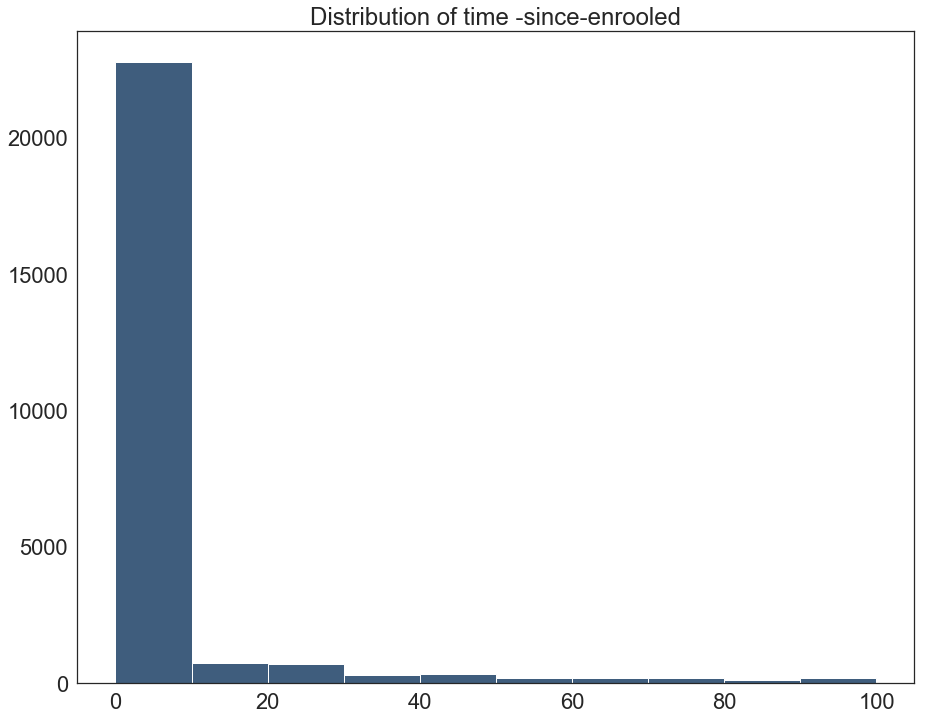

In [104]:
### 大部分的人都在前500小時註冊,但500小時範圍還是太大,所以抽出前100小時試試看
plt.figure(figsize=(15,12))
plt.hist(dataset["difference"].dropna(),color="#3F5D7D" ,range=[0,100])
plt.title('Distribution of time -since-enrooled')
plt.show()

In [105]:
### 極少數的人超過50小時後才註冊,所以將超過兩天(48小時)才註冊的用戶的 enrolled 標記為0
dataset.loc[dataset.difference > 48,'enrolled']=0

dataset = dataset.drop(columns=['difference','first_open','enrolled_date'])

In [106]:
### 處理 screen

In [107]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [108]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")
    
dataset["other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

In [109]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [110]:
# Funnels

savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
                  "Credit2",
                  "Credit3",
                  "Credit3Container",
                  "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

loan_screens = ["Loan",
                  "Loan2",
                  "Loan3",
                  "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,0,3,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,10,0,2,1


In [111]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000


In [112]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'CC1Category', 'Splash', 'CC1',
       'RewardsContainer', 'EditProfile', 'Finances', 'CC3', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingCount', 'CMCount', 'LoansCount'],
      dtype='object')

In [113]:
dataset.to_csv("new_appdata102.csv",index=False)